In [1]:
import numpy  as np
import pandas as pd

print('numpy  version - ' , np.__version__) 
print('pandas version - ' , pd.__version__) 

from   io import StringIO
import missingno as msno
# ml
import sklearn
from   sklearn.datasets import load_iris, load_breast_cancer

print('sklearn version - ' , sklearn.__version__)

from sklearn.model_selection import train_test_split, KFold , StratifiedKFold , cross_val_score, cross_validate, GridSearchCV 
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier         
from sklearn.linear_model    import LogisticRegression , LinearRegression


from sklearn.metrics         import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer , precision_recall_curve 
from sklearn.impute          import SimpleImputer

from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.cluster import KMeans

numpy  version -  1.20.3
pandas version -  1.3.4
sklearn version -  0.24.2


## 군집화
- 데이터 포인트들을 별개의 군집으로 그룹화하는 것을 의미함.
- 유사성이 높은 데이터들을 동일한 그룹으로 분류하고 서로 다른 군집들이 상이성을 가지도록 하는 알고리즘
- 이상치에 취약함

In [6]:
cluster_frm = pd.DataFrame(columns = ('x','y'))
cluster_frm.loc[0] = [7,1]
cluster_frm.loc[1] = [2,1]
cluster_frm.loc[2] = [4,2]
cluster_frm.loc[3] = [9,4]
cluster_frm.loc[4] = [10,5]
cluster_frm.loc[5] = [10,6]
cluster_frm.loc[6] = [11,5]
cluster_frm.loc[7] = [11,6]
cluster_frm.loc[8] = [16,6]
cluster_frm.loc[9] = [16,6]
cluster_frm.loc[10] = [15,3]
cluster_frm.loc[11] = [15,2]
cluster_frm.loc[12] = [16,1]

In [7]:
cluster_frm

,x,y
0,7,1
1,2,1
2,4,2
3,9,4
4,10,5
5,10,6
6,11,5
7,11,6
8,16,6
9,16,6


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


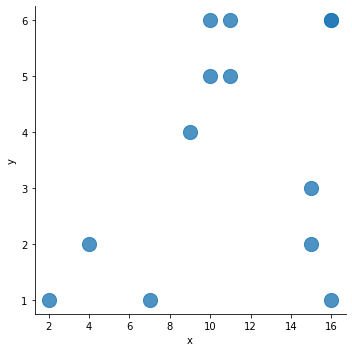

In [8]:
sns.lmplot('x','y',
        data = cluster_frm,
        fit_reg =False,
        scatter_kws = {'s':200})

In [10]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(cluster_frm)

KMeans(n_clusters=3)

In [12]:
print('type :', type(kmeans))
print(type(kmeans.labels_))

type : <class 'sklearn.cluster._kmeans.KMeans'>
<class 'numpy.ndarray'>


In [13]:
cluster_frm['cluster_id'] = kmeans.labels_
cluster_frm

,x,y,cluster_id
0,7,1,2
1,2,1,2
2,4,2,2
3,9,4,1
4,10,5,1
5,10,6,1
6,11,5,1
7,11,6,1
8,16,6,0
9,16,6,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


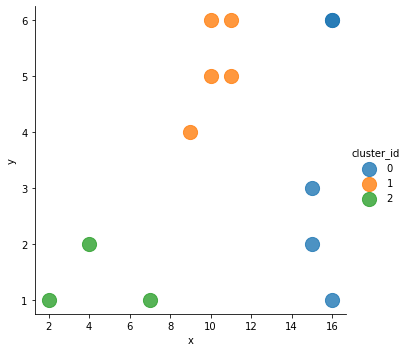

In [14]:
sns.lmplot('x','y',
        data = cluster_frm,
        fit_reg =False,
        scatter_kws = {'s':200},
        hue = 'cluster_id')

In [23]:
iris = load_iris()

In [24]:
iris_frm =  pd.DataFrame(data = iris.data , columns=iris.feature_names)

In [27]:
iris_kmeans = KMeans(n_clusters= 3,
                     verbose = 1,
                     init = 'k-means++',
                     max_iter = 300)
iris_kmeans.fit(iris_frm)

Initialization complete
Iteration 0, inertia 118.81000000000007
Iteration 1, inertia 78.94269779286924
Iteration 2, inertia 78.851441426146
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 124.94999999999996
Iteration 1, inertia 83.55990208333336
Iteration 2, inertia 82.4716868394502
Iteration 3, inertia 81.54360278471792
Iteration 4, inertia 80.80637599999999
Iteration 5, inertia 79.87357983461304
Iteration 6, inertia 79.34436414532675
Iteration 7, inertia 78.92130972222225
Iteration 8, inertia 78.85566582597727
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 111.39000000000001
Iteration 1, inertia 79.20522441958194
Iteration 2, inertia 78.851441426146
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 133.55000000000004
Iteration 1, inertia 81.79567343980543
Iteration 2, inertia 80.80637599999999
Iteration 3, inertia 79.87357983461304
Iteration 4, inertia 79.34

KMeans(n_clusters=3, verbose=1)

In [28]:
iris_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [30]:
iris_kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [31]:
iris_frm['cid'] = iris_kmeans.labels_
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
iris_frm['target'] = iris.target

In [33]:
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,0,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


## cid를 기준으로 sepal length의 빈도를 확인 한다면?

In [39]:
iris_frm.groupby(['target','cid'])['sepal length (cm)'].count()

target  cid
0       1      50
1       0      48
        2       2
2       0      14
        2      36
Name: sepal length (cm), dtype: int64

## 주성분분석(Principal Components Analysis)
- 고차원 데이터를 저차원의 데이터로 차원을 축소시키는 방법 : 모든 피처가 결과에 영향을 미치는건 아니기 때문에
- 시각화를 위해서는 2차원이어야 함
- 이점? : 시각화, 노이즈제거, 메모리 절약, 모델의 성능을 개선

In [2]:
from sklearn.decomposition import PCA
iris_pca = PCA(n_components = 2)
iris_pca_trans = iris_pca.fit_transform(iris.data)
iris_pca_trans

NameError: name 'iris' is not defined

In [42]:
iris_frm['pca_x'] = iris_pca_trans[:, 0]
iris_frm['pca_y'] = iris_pca_trans[:, 1]

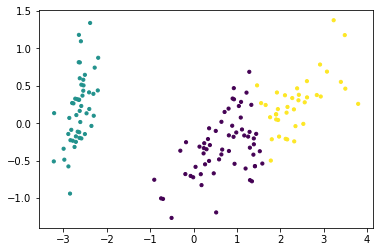

In [43]:
plt.scatter(iris_frm['pca_x'], iris_frm['pca_y'],
            marker = 'o',
            c = iris_frm['cid'],
            s = 10)
plt.show()
plt.close()

In [44]:
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,0,2,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


## 차원축소시 피처의 유닛이 다를경우 스케일링이 필요함

In [3]:
def feature_scaling(method = 'None', input_data = None) :
    if method == 'standard':
        return StandardScaler().fit_transform(input_data)
    if method == 'minmax':
        return MinMaxScaler().fit_transform(input_data)

In [46]:
std_scaler = feature_scaling(method = 'standard',
                input_data = iris_frm.iloc[:, : 4])
std_scaler

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [47]:
iris_pca = PCA(n_components = 2)
iris_pca_trans = iris_pca.fit_transform(std_scaler)
iris_pca_trans

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [48]:
iris_frm['std_pca_x'] = iris_pca_trans[:, 0]
iris_frm['std_pca_y'] = iris_pca_trans[:, 1]
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target,pca_x,pca_y,std_pca_x,std_pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755,-2.389842,0.646835
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532,1.870503,0.386966
146,6.3,2.5,5.0,1.9,0,2,1.527167,-0.375317,1.564580,-0.896687
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859,1.521170,0.269069
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628,1.372788,1.011254


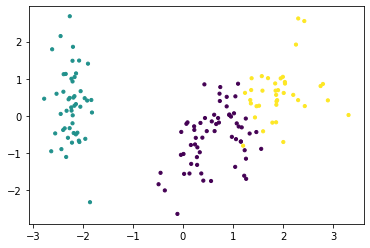

In [49]:
plt.scatter(iris_frm['std_pca_x'], iris_frm['std_pca_y'],
            marker = 'o',
            c = iris_frm['cid'],
            s = 10)
plt.show()
plt.close()

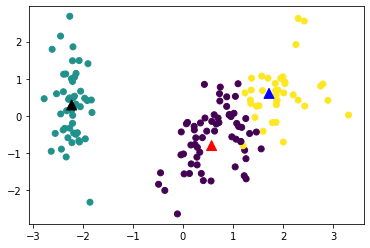

In [57]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(iris_frm.iloc[ : , -2 :])


plt.scatter(iris_frm['std_pca_x'] , iris_frm['std_pca_y'],
            marker = 'o' , 
            c = iris_frm['cid'])

plt.scatter(kmeans.cluster_centers_[ : , 0] , kmeans.cluster_centers_[ : , 1],
            marker = '^' , 
            c = ['r', 'k' , 'b'] , 
            s = 100)

plt.show()
plt.close()

### KMeans 실습
-wholesale customers(도매업 고객)

In [70]:
customer_frm = pd.read_csv("./dataset/Wholesale customers data.csv")
customer_frm.info()
customer_frm.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [71]:
customer_frm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [61]:
customer_frm['Channel'].unique()

array([2, 1], dtype=int64)

In [62]:
customer_frm['Region'].unique()

array([3, 1, 2], dtype=int64)

In [73]:
customer_frm
X = customer_frm

In [74]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [75]:
X['cluster_id'] = kmeans.labels_
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,2
438,1,3,10290,1981,2232,1038,168,2125,0


In [64]:
customer_pca = PCA(n_components = 3)
customer_pca_trans = iris_pca.fit_transform(customer_frm)
customer_pca_trans

array([[ 6.50022120e+02,  1.58551911e+03],
       [-4.42680498e+03,  4.04245152e+03],
       [-4.84199871e+03,  2.57876219e+03],
       [ 9.90346444e+02, -6.27980600e+03],
       [ 1.06579987e+04, -2.15972579e+03],
       [-2.76596159e+03, -9.59870712e+02],
       [-7.15550892e+02, -2.01300225e+03],
       [-4.47458367e+03,  1.42949698e+03],
       [-6.71209539e+03, -2.20590917e+03],
       [-4.82363437e+03,  1.34805592e+04],
       [-7.97482899e+03,  5.71121893e+03],
       [ 3.63937822e+01, -6.03789639e+03],
       [ 1.99402020e+04,  4.59128651e+03],
       [ 9.39669557e+03,  5.91315706e+03],
       [ 1.26603704e+04,  4.54194546e+03],
       [-2.99772589e+03, -6.09387931e+03],
       [-1.05895236e+04,  6.58421595e+03],
       [-6.36709517e+03, -3.68071268e+03],
       [ 6.62382533e+03,  1.25471955e+03],
       [-4.86153157e+03, -2.25592277e+02],
       [ 4.79424416e+03, -3.98879934e+03],
       [-7.24486683e+03, -7.34772327e+03],
       [ 1.92992657e+04, -6.93681067e+03],
       [ 1.

In [65]:
customer_frm['customer_x'] = customer_pca_trans[:, 0]
customer_frm['customer_y'] = customer_pca_trans[:, 1]
customer_frm

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,customer_x,customer_y
0,2,3,12669,9656,7561,214,2674,1338,650.022120,1585.519107
1,2,3,7057,9810,9568,1762,3293,1776,-4426.804984,4042.451521
2,2,3,6353,8808,7684,2405,3516,7844,-4841.998710,2578.762188
3,1,3,13265,1196,4221,6404,507,1788,990.346444,-6279.806002
4,2,3,22615,5410,7198,3915,1777,5185,10657.998731,-2159.725789
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,20140.848491,6306.877234
436,1,3,39228,1431,764,4510,93,2346,25912.249956,-11757.647089
437,2,3,14531,15488,30243,437,14841,1867,4555.114978,26201.758616
438,1,3,10290,1981,2232,1038,168,2125,-2734.370912,-7070.775343


In [66]:
std_scaler = feature_scaling(method = 'standard',
                input_data = iris_frm.iloc[:, : 4])
std_scaler

NameError: name 'customer_kmeans' is not defined

### 고등학교 진학률 데이터를 활용하여 속성이 비슷한 중학교끼리 클러스터 [실습]
- 데이터 인코딩, 지도시각화(위도, 경도, folium)

In [4]:
middle_frm = pd.read_excel('./dataset/middle_shcool_graduates_report.xlsx', header = 0)
middle_frm.drop('Unnamed: 0', axis=1 , inplace=True)
middle_frm

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744
3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201
4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,강남구,국립국악중학교,9,국립,주간,9,91,0.060,0.000,0.000,0.000,0.940,0.000,0.000,0.000,0.000,0,0.000,37.476381,127.051355
411,금천구,국립전통예술중학교,9,국립,주간,14,42,0.107,0.000,0.000,0.000,0.875,0.000,0.000,0.000,0.000,0,0.018,37.446354,126.906424
412,광진구,선화예술학교,9,사립,주간,33,241,0.102,0.000,0.000,0.000,0.861,0.000,0.000,0.000,0.000,0,0.036,37.549642,127.087737
413,중구,예원학교,9,사립,주간,31,258,0.170,0.000,0.000,0.000,0.751,0.000,0.000,0.000,0.048,0,0.031,37.566951,126.971553


In [5]:
import folium

In [6]:
middle_map = folium.Map(location=[37.56686186438055, 126.98069623007629],
                        zoom_start = 12,
                       tiles = 'Stamen Toner')

for name, lat, lng in zip(middle_frm['학교명'], middle_frm['위도'], middle_frm['경도']) :
    folium.Marker(
        [lat, lng],
        popup = name,
        icon = folium.Icon(color='red')
    ).add_to(middle_map)
middle_map

### 진행절차
#### step01. 데이터 전처리 - (지역, 코드 , 유형, 주야)
#### step02. 군집모형생성 - 분석에 사용할 피처는 과학고, 외고국제고, 자사고 진학률
#### step03. 표준화
#### step04. 모형 객체 생성
#### step05. 모형 학습
#### step06. 예측
#### step07. 예측 결과를 데이터 프레임에 추가
#### step08. 클러스터 값으로 그룹화, 그룹별 내용 출력
#### step09. 지도 그래프 시각화

In [62]:
X_step1 = middle_frm
label_encoder = LabelEncoder()
X_step1['지역'] = label_encoder.fit_transform(X_step1['지역'])
X_step1['코드'] = label_encoder.fit_transform(X_step1['코드'])
X_step1['유형'] = label_encoder.fit_transform(X_step1['유형'])
X_step1['주야'] = label_encoder.fit_transform(X_step1['주야'])

In [63]:
X_step2 = X_step1.loc[:,['과학고', '외고_국제고', '자사고']]
X_step2

,과학고,외고_국제고,자사고
0,0.018,0.007,0.227
1,0.000,0.035,0.043
2,0.009,0.012,0.090
3,0.013,0.013,0.065
4,0.007,0.010,0.282
...,...,...,...
410,0.000,0.000,0.000
411,0.000,0.000,0.000
412,0.000,0.000,0.000
413,0.000,0.000,0.000


In [64]:
std_scaler = feature_scaling(method = 'standard',
                input_data = X_step2)
std_scaler

array([[ 2.02375287, -0.57972902,  1.84751715],
       [-0.65047921,  1.84782097, -0.48039958],
       [ 0.68663683, -0.14623795,  0.11423133],
       ...,
       [-0.65047921, -1.18661652, -1.0244236 ],
       [-0.65047921, -1.18661652, -1.0244236 ],
       [-0.65047921,  0.89414062, -0.89790638]])

In [65]:
X_step3_std = X_step2.drop(['과학고','외고_국제고','자사고'],axis=1)
X_step3_std['std_과학고'] = std_scaler[:, 0]                # PCA 안하고 정규화만 한 것.
X_step3_std['std_외고_국제고'] = std_scaler[:, 1]
X_step3_std['std_자사고'] = std_scaler[:, 2]
X_std = X_step3_std
X_std

,std_과학고,std_외고_국제고,std_자사고
0,2.023753,-0.579729,1.847517
1,-0.650479,1.847821,-0.480400
2,0.686637,-0.146238,0.114231
3,1.280911,-0.059540,-0.202062
4,0.389500,-0.319634,2.543362
...,...,...,...
410,-0.650479,-1.186617,-1.024424
411,-0.650479,-1.186617,-1.024424
412,-0.650479,-1.186617,-1.024424
413,-0.650479,-1.186617,-1.024424


In [66]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_std)
X_std['cid'] = kmeans.labels_
X_std
kmeans.cluster_centers_

array([[-0.19496274,  0.93176437, -0.15837746],
       [ 0.04914312,  0.11543302,  1.6347382 ],
       [ 2.15375026,  0.34360696,  0.587722  ],
       [-0.37716933, -0.62389604, -0.50242074],
       [ 5.88653253,  6.70292097,  4.94086303]])

In [67]:
X_pca = PCA(n_components = 2)                               # PCA로 2개로 압축
X_pca_trans = X_pca.fit_transform(std_scaler)
X_pca_trans

array([[ 1.98514011e+00,  1.96554782e+00],
       [ 3.30622168e-01, -1.97915681e+00],
       [ 3.97483595e-01,  4.12711201e-01],
       [ 6.11474120e-01,  4.19378497e-01],
       [ 1.56419417e+00,  1.45698662e+00],
       [ 1.19980926e-01,  7.65527454e-01],
       [ 3.85514451e+00,  2.36590364e-01],
       [ 2.97338343e+00,  2.73671310e+00],
       [ 2.12804948e+00, -2.11404855e-01],
       [ 1.06429030e+00, -7.83475170e-01],
       [ 3.37964582e+00,  1.12887411e+00],
       [ 9.94614098e-01, -4.19012652e-01],
       [ 1.72248532e+00, -8.11332730e-01],
       [-3.18391200e-01, -1.05949244e+00],
       [ 1.67888367e+00,  1.19241711e+00],
       [ 5.59922334e-01, -1.07467159e-01],
       [ 8.93700427e-01,  9.61047253e-01],
       [-5.06112251e-01, -2.68020367e-01],
       [ 1.86527312e+00,  8.35177428e-01],
       [ 2.87810660e+00,  6.29024250e-01],
       [-1.24174406e-01, -1.37769890e-03],
       [ 1.65493296e+00,  1.02947843e+00],
       [-4.14588524e-01, -8.09859834e-01],
       [ 3.

In [68]:
X_step3_pca = X_step2
X_step3_pca['std_pca_x'] = X_pca_trans[:, 0]
X_step3_pca['std_pca_y'] = X_pca_trans[:, 1]
X_pca = X_step3_pca.iloc[:, [-1,-2]]
X_pca

,std_pca_y,std_pca_x
0,1.965548,1.985140
1,-1.979157,0.330622
2,0.412711,0.397484
3,0.419378,0.611474
4,1.456987,1.564194
...,...,...
410,0.342427,-1.637934
411,0.342427,-1.637934
412,0.342427,-1.637934
413,0.342427,-1.637934


In [69]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_pca)
X_pca['cid'] = kmeans.labels_
X_pca
kmeans.cluster_centers_

C:\Users\alswo\AppData\Local\Temp/ipykernel_13268/3426114514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pca['cid'] = kmeans.labels_


array([[-1.05951237,  0.48140408],
       [ 0.43913157,  0.3974846 ],
       [ 0.08669027, -0.98149554],
       [-1.50165941, 10.06998133],
       [ 1.17577721,  2.41475115]])

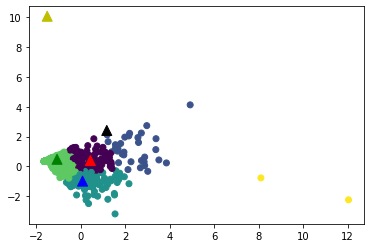

In [14]:
kmeans.fit(X.iloc[ : , [0,1]])


plt.scatter(X['std_pca_x'] , X['std_pca_y'],
            marker = 'o' , 
            c = X['cid'])

plt.scatter(kmeans.cluster_centers_[ : , 0] , kmeans.cluster_centers_[ : , 1],
            marker = '^' , 
            c = ['r', 'k' , 'b', 'y', 'g'] , 
            s = 100)

plt.show()
plt.close()

In [15]:
X_naming = X
X_naming['학교명'] = middle_frm['학교명']
X_naming['위도'] =  middle_frm['위도']
X_naming['경도'] = middle_frm['경도']
X_naming

C:\Users\alswo\AppData\Local\Temp/ipykernel_13268/4278194131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_naming['학교명'] = middle_frm['학교명']


,std_pca_y,std_pca_x,cid,학교명,위도,경도
0,1.965548,1.985140,1,서울대학교사범대학부설중학교,37.594942,127.038909
1,-1.979157,0.330622,2,서울대학교사범대학부설여자중학교,37.577473,127.003857
2,0.412711,0.397484,0,개원중학교,37.491637,127.071744
3,0.419378,0.611474,0,개포중학교,37.480439,127.062201
4,1.456987,1.564194,1,경원중학교,37.510750,127.008900
...,...,...,...,...,...,...
410,0.342427,-1.637934,3,국립국악중학교,37.476381,127.051355
411,0.342427,-1.637934,3,국립전통예술중학교,37.446354,126.906424
412,0.342427,-1.637934,3,선화예술학교,37.549642,127.087737
413,0.342427,-1.637934,3,예원학교,37.566951,126.971553


In [16]:
X_naming['cid'].value_counts()

3    186
0    104
2     91
1     32
4      2
Name: cid, dtype: int64

In [17]:
for name, lat, lng, cd in zip(X_naming['학교명'], X_naming['위도'], X_naming['경도'], X_naming['cid']) :
    if cd == 0:
        color = 'blue'
    elif cd == 1:
        color = 'red'
    elif cd == 2:    
        color = 'green'
    elif cd == 3:    
        color = 'gray'
    else:
        color = 'white'  # 4
    
    folium.Marker(
        [lat, lng],
        popup = name,
        icon=folium.Icon(color = color)
    ).add_to(middle_map)
middle_map